In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

Punto 1. 

In [63]:
N = 80  
delta = 2.0 / (N - 1)  
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
rho = -X - Y  
phi = np.random.rand(N, N) 

theta = np.arctan2(Y, X)
phi[np.sqrt(X**2 + Y**2) >= 1] = np.sin(7 * theta[np.sqrt(X**2 + Y**2) >= 1])

tolerancia = 1e-4  
max_iter = 15000 

def calcular_traza(phi_viejo, phi_nuevo):
    return np.trace(np.abs(phi_viejo - phi_nuevo))

for it in range(max_iter):
    phi_viejo = phi.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            if X[i, j]**2 + Y[i, j]**2 < 1: 
                phi[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]
                                    - delta**2 * 4 * np.pi * rho[i, j])
    traza = calcular_traza(phi_viejo, phi)
    if traza < tolerancia:
        print(f'Convergencia alcanzada en {it} iteraciones con traza {traza:.5f}.')
        break
else:
    print(f'No se alcanzó la convergencia después de {max_iter} iteraciones.')

Convergencia alcanzada en 3367 iteraciones con traza 0.00010.


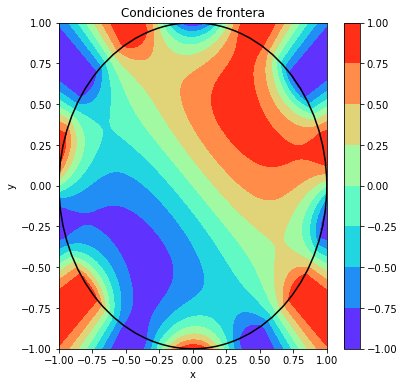

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))
c = ax.contourf(X, Y, phi, cmap='rainbow')

circulo = plt.Circle((0, 0), 1, color='k', fill=False, linewidth=1.5)
ax.add_artist(circulo)

plt.colorbar(c)
ax.set_title('Condiciones de frontera')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

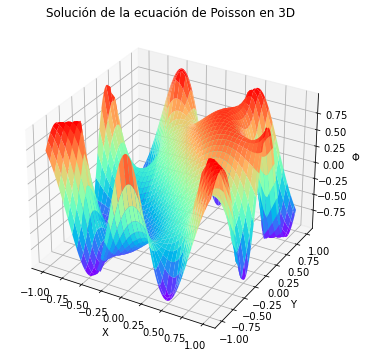

In [65]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, phi, cmap='rainbow')
ax.set_title('Solución de la ecuación de Poisson en 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Φ')
plt.show()

Bono punto 1

MovieWriter imagemagick unavailable; using Pillow instead.


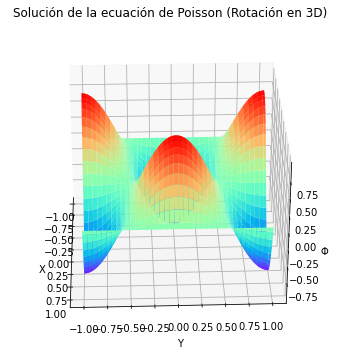

In [66]:
def actualizar_ángulo_vista(frame, ax):
    ax.view_init(elev=30, azim=frame)
    return ax,

N = 80
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
phi = np.sin(np.pi * X) * np.cos(np.pi * Y)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

superficie = ax.plot_surface(X, Y, phi, cmap='rainbow')

ax.set_title('Solución de la ecuación de Poisson (Rotación en 3D)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Φ')

anim = FuncAnimation(fig, actualizar_ángulo_vista, frames=np.arange(0, 360, 2), fargs=(ax,), interval=50)
#anim.save('rotacion_3d.mp4', writer='ffmpeg')  # Requiere tener instalado ffmpeg
anim.save('1.rotacion_3d.gif', writer='imagemagick', fps=30)
plt.show()

Punto 2
(con bono)

MovieWriter imagemagick unavailable; using Pillow instead.


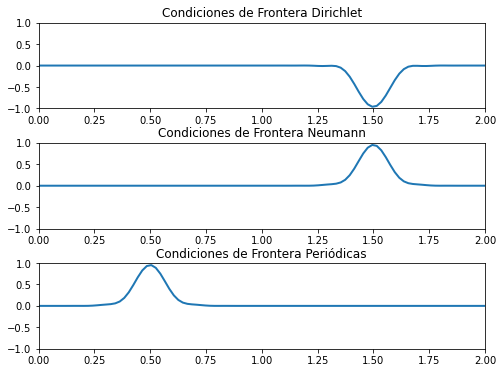

In [67]:
L = 2.0       
c = 1.0         
nx = 100        
dx = L / (nx - 1) 
dt = 0.005      
C = c * dt / dx 
t_total = 2.0
nt = int(t_total / dt)

x = np.linspace(0, L, nx)
u0 = np.exp(-125 * (x - 0.5)**2) 

u_dirichlet = np.copy(u0)
u_neumann = np.copy(u0)
u_periodica = np.copy(u0)

u_dirichlet_viejo = np.copy(u0)
u_neumann_viejo = np.copy(u0)
u_periodica_viejo = np.copy(u0)

def update(frame):
    global u_dirichlet, u_neumann, u_periodica
    global u_dirichlet_viejo, u_neumann_viejo, u_periodica_viejo
    u_nuevo_dirichlet = np.copy(u_dirichlet)
    u_nuevo_neumann = np.copy(u_neumann)
    u_nuevo_periodica = np.copy(u_periodica)

    for i in range(1, nx-1):
        u_nuevo_dirichlet[i] = 2 * u_dirichlet[i] - u_dirichlet_viejo[i] + C**2 * (u_dirichlet[i+1] - 2 * u_dirichlet[i] + u_dirichlet[i-1])
        u_nuevo_neumann[i] = 2 * u_neumann[i] - u_neumann_viejo[i] + C**2 * (u_neumann[i+1] - 2 * u_neumann[i] + u_neumann[i-1])
        u_nuevo_periodica[i] = 2 * u_periodica[i] - u_periodica_viejo[i] + C**2 * (u_periodica[i+1] - 2 * u_periodica[i] + u_periodica[i-1])

    u_nuevo_dirichlet[0] = 0
    u_nuevo_dirichlet[-1] = 0

    u_nuevo_neumann[0] = u_nuevo_neumann[1]
    u_nuevo_neumann[-1] = u_nuevo_neumann[-2]

    u_nuevo_periodica[0] = u_nuevo_periodica[-2]
    u_nuevo_periodica[-1] = u_nuevo_periodica[1]

    u_dirichlet_viejo = np.copy(u_dirichlet)
    u_neumann_viejo = np.copy(u_neumann)
    u_periodica_viejo = np.copy(u_periodica)

    u_dirichlet = u_nuevo_dirichlet
    u_neumann = u_nuevo_neumann
    u_periodica = u_nuevo_periodica

    line1.set_ydata(u_dirichlet)
    line2.set_ydata(u_neumann)
    line3.set_ydata(u_periodica)
    return line1, line2, line3

fig, axs = plt.subplots(3, 1, figsize=(8, 6))
lines = []
plt.subplots_adjust(hspace=0.4) 

for ax in axs:
    ax.set_xlim(0, L)
    ax.set_ylim(-1, 1)
    line, = ax.plot(x, u0, lw=2)
    lines.append(line)

line1, line2, line3 = lines
axs[0].set_title('Condiciones de Frontera Dirichlet')
axs[1].set_title('Condiciones de Frontera Neumann')
axs[2].set_title('Condiciones de Frontera Periódicas')

anim = FuncAnimation(fig, update, frames=nt, interval=50, blit=True)
#anim.save('onda_1D_subplots.mp4', writer='ffmpeg')
anim.save('2.condiciones_de_frontera_onda.gif', writer='imagemagick', fps=30)
plt.show()

Punto 3

3.1) & 3.3)

MovieWriter ffmpeg unavailable; using Pillow instead.


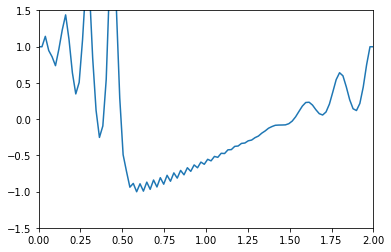

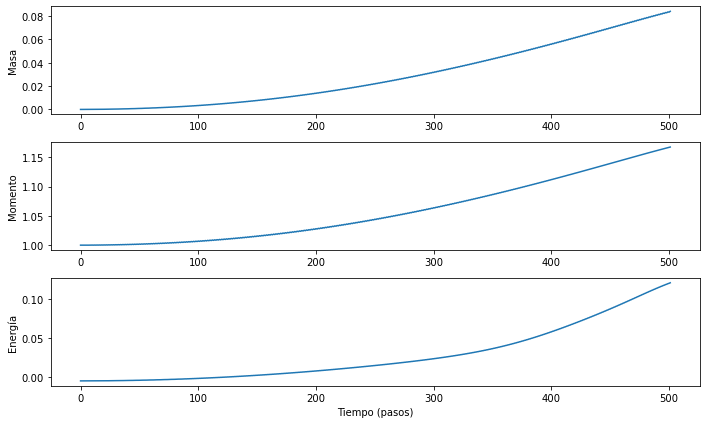

In [68]:
alpha = 0.022 
L = 2.0 
N = 100 
dx = L / N  
x = np.linspace(0, L, N)  
dt = 0.001  
steps = 500 
delta = 1  

psi_j = np.cos(np.pi * x)  
psi_j_menos_1 = np.copy(psi_j) 

def condiciones_periodicas(u):
    u[0] = u[-2]
    u[-1] = u[1]
    return u

def evolucionar(psi_j, psi_j_menos_1, dt, dx, alpha):
    psi_sig = np.copy(psi_j)  
    
    k = dt
    h = dx

    for i in range(2, N-2):
        term1 = (psi_j[i+1] + psi_j[i] + psi_j[i-1]) * (psi_j[i+1] - psi_j[i-1]) / (3 * h)
        term2 = (psi_j[i+2] - 2*psi_j[i+1] + 2*psi_j[i-1] - psi_j[i-2]) / (h**3)
        psi_sig[i] = psi_j_menos_1[i] - k * (term1 + alpha**2 * term2)
    psi_sig = condiciones_periodicas(psi_sig)
    
    return psi_sig

fig, ax = plt.subplots()
line, = ax.plot(x, psi_j)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, L)


def calcular_masa(psi):
    return np.trapz(psi, x)

def calcular_momento(psi):
    return np.trapz(psi**2, x)

def calcular_energia(psi, alpha, dx):
    dpsi_dx = np.gradient(psi, dx) 
    energia = np.trapz((1/3) * psi**3 - (alpha**2) * dpsi_dx**2, x)
    return energia

masas = []
momentos = []
energias = []


def update(frame):
    global psi_j, psi_j_menos_1
    psi_sig = evolucionar(psi_j, psi_j_menos_1, dt, dx, alpha)
    psi_j_menos_1 = np.copy(psi_j)
    psi_j = np.copy(psi_sig)

    masa = calcular_masa(psi_j)
    momento = calcular_momento(psi_j)
    energia = calcular_energia(psi_j, alpha, dx)
    
    masas.append(masa)
    momentos.append(momento)
    energias.append(energia)
    
    line.set_ydata(psi_j)
    return line,

anim = FuncAnimation(fig, update, frames=steps, interval=50, blit=True)
anim.save('3.simulacion_kdv_correcta.gif', writer='ffmpeg', fps=30)
#anim.save('3.simulacion_kdv_correcta.gif', writer='imagemagick', fps=30)

#anim = FuncAnimation(fig, update, frames=steps, interval=50, blit=True)
#anim.save('B.simulacion_kdv_correcta.gif', writer='ffmpeg', fps=30)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(range(steps+2), masas, label='Masa')
plt.ylabel('Masa')
plt.subplot(3, 1, 2)
plt.plot(range(steps+2), momentos, label='Momento')
plt.ylabel('Momento')
plt.subplot(3, 1, 3)
plt.plot(range(steps+2), energias, label='Energía')
plt.ylabel('Energía')
plt.xlabel('Tiempo (pasos)')
plt.tight_layout()
plt.show()

En estos gráficos se evidencia que la masa, el momento y la energía se mantienen relativamente constantes, con una variación bastante pequeña (se observa que la variación en el eje y es mínima), que podrían deberse a errores numéricos, lo que sugiere que están conservados de forma aproximada. Este comportamiento indica que el esquema de diferencias finitas utilizado es adecuado para modelar el sistema sin introducir grandes desviaciones en las cantidades conservadas. Aunque existen fluctuaciones menores, estas no afectan significativamente la dinámica global, lo cual refuerza la validez del modelo numérico para estudiar el comportamiento del plasma en el tiempo.

3.2)  ¿Qué pasa si aumenta o disminuye el valor de 𝛼?

Si el valor de 𝛼 aumenta hay mayor dispersión de las ondas, es decir, las ondas iniciales tienden a 'esparcirse' en ondas de menor amplitud y de forma más difusa. Esto también implica que hay menor tendencia a que se formen solitones (soluciones estables en KdV) entonces si 𝛼 aumenta, los solitones son menos estables.

Por otro lado, si el valor de 𝛼 disminuye hay menor dispersión de las ondas entonces estas logran conservar su forma durante más tiempo. En cuanto a los solitones, un menor 𝛼 favorece la formación de solitones estables y definidos que no se dispersan tan fácilmente. 

Punto 4

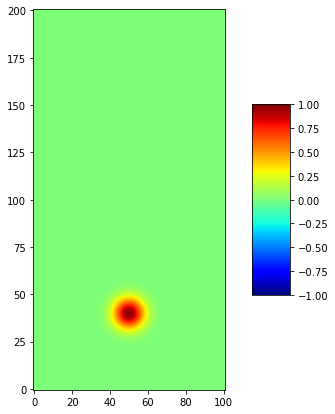

In [69]:
dx = 0.01  
dy = 0.01  
dt = 0.01 
c = 0.5  
tmax = 3.0 
xmax = 2.0  
ymax = 1.0  
nx = int(xmax/dx) + 1
ny = int(ymax/dy) + 1 
nt = int(tmax/dt) + 1

x = np.linspace(0, xmax, nx)
y = np.linspace(0, ymax, ny)
u = np.zeros((nx, ny)) 
u_nuevo = np.zeros((nx, ny))  
u_viejo = np.zeros((nx, ny))  

for i in range(nx):
    for j in range(ny):
        u[i, j] = np.exp(-150 * ((x[i] - 0.4)**2 + (y[j] - 0.5)**2))

def condiciones_frontera_dirichlet(u):
    u[0, :] = 0  
    u[-1, :] = 0 
    u[:, 0] = 0  
    u[:, -1] = 0 

    for i in range(nx):
        for j in range(ny):
            if (0 < y[j] < 0.42) and (0.99 < x[i] < 1.01):
                u[i, j] = 0
            if (0.58 < y[j] < 1) and (0.99 < x[i] < 1.01):
                u[i, j] = 0

    return u

def condiciones_frontera_neumann(u):
    u[0, :] = u[1, :] 
    u[-1, :] = u[-2, :] 
    u[:, 0] = u[:, 1]  
    u[:, -1] = u[:, -2] 
    
    for i in range(nx):
        for j in range(ny):
            if (0 < y[j] < 0.42) and (0.99 < x[i] < 1.01):
                u[i, j] = 0
            if (0.58 < y[j] < 1) and (0.99 < x[i] < 1.01):
                u[i, j] = 0

    return u

X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.imshow(u, interpolation='bilinear', cmap='jet', origin='lower', vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax, shrink=0.5, aspect=5)

In [70]:
def actualizar_frame_dirichlet(frame): 
    global u, u_nuevo, u_viejo
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_nuevo[i, j] = (2 * u[i, j] - u_viejo[i, j] +
                           (c * dt/dx) ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                           (c * dt/dy) ** 2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))
    u_viejo = u.copy()
    u = u_nuevo.copy()    
    condiciones_frontera_dirichlet(u)
    cax.set_data(u)
    return cax,

anim_dirichlet = FuncAnimation(fig, actualizar_frame_dirichlet, frames=nt, interval=50, blit=True)
anim_dirichlet.save('4.1.simulacion_dirichlet.gif', writer='ffmpeg')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [71]:
def actualizar_frame_neumann(frame): 
    global u, u_nuevo, u_viejo
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_nuevo[i, j] = (2 * u[i, j] - u_viejo[i, j] +
                           (c * dt/dx) ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                           (c * dt/dy) ** 2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))
    u_viejo = u.copy()
    u = u_nuevo.copy()
    condiciones_frontera_neumann(u)
    cax.set_data(u)
    return cax,

anim_neumann = FuncAnimation(fig, actualizar_frame_neumann, frames=nt, interval=50, blit=True)
anim_neumann.save('4.2.simulacion_neumann.gif', writer='ffmpeg')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
